<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [1]:
#pip install transformers

In [2]:
#pip install lazypredict
#pip install googletrans==4.0.0-rc1
#pip install textblob
#pip install vaderSentiment

In [3]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

C:\Users\HP ZBook 15\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [4]:
dicionario_mes_2021 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}
dicionario_mes_2020 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dez':'12'}
dicionario_mes_2022 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06'}

In [5]:
df = pd.DataFrame()

for i in dicionario_mes_2020.keys():
    arquivo = "dataset-2020/" + dicionario_mes_2020[i] + "_GoogleNews_Petr_" + i + "-2020.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

for i in dicionario_mes_2021.keys():
    arquivo = "dataset-2021/" + dicionario_mes_2021[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)


for i in dicionario_mes_2022.keys():
    arquivo = "dataset-2022/" + dicionario_mes_2022[i] + "_GoogleNews_Petr_" + i + "_22.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)
    

In [6]:
df

,title,media,date,desc
0,Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...,Correio Braziliense,01/01/2020,O dinheiro que será distribuído veio do leilão...
1,"Preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,01/01/2020,O diesel foi o segundo combustível com maior a...
2,"Série ""Cineastas"" e mais dicas para curtir na ...",GZH,01/01/2020,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,Feriados em 2020: 11 datas serão em dias da se...,Money Times,01/01/2020,O dia 29 de fevereiro cairá em um sábado. Veja...
4,O incêndio que matou quase todos os macacos em...,BBC,01/01/2020,Principais notícias. Como a Petrobras virou te...
...,...,...,...,...
7978,Petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,30/06/2022,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,Governo avalia mecanismo para obrigar Petrobra...,BiodieselBR.com,30/06/2022,A Petrobras chegou a assinar em 2019 um acordo...
7980,Postos Petrobras e Shell se rendem à recarga d...,Quatro Rodas,30/06/2022,O eletroposto foi instalado no posto Petrobras...
7981,Ações Petrobras: saiba o preço após fechamento...,UOL Economia,30/06/2022,As ações da Petrobras fecharam em queda nesta ...


In [7]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [8]:
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro_2020 = pd.read_csv('dataset-2020/Hist_Preço_Petr_2020_.csv', sep='|')
df_petro_2022 = pd.read_csv('dataset-2022/Hist_Preço_Petr_2022_.csv', sep='|')
df_petro = df_petro_2020.append(df_petro,ignore_index=True)
df_petro = df_petro.append(df_petro_2022,ignore_index=True)
df_petro

,Date,Adj Close,Volume,Var%
0,2020-01-02,20.47,37774500,0.02
1,2020-01-03,20.30,71595600,-0.01
2,2020-01-06,20.54,81844000,0.01
3,2020-01-07,20.46,32822000,-0.00
4,2020-01-08,20.33,48215600,-0.01
...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01
615,2022-06-27,27.98,90417700,0.06
616,2022-06-28,28.33,51388000,0.01
617,2022-06-29,28.08,52048800,-0.01


In [9]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [10]:
df.date.value_counts()

2022-01-06    10
2022-03-06    10
2021-09-12    10
2021-04-16    10
2021-05-05    10
              ..
2020-12-27     2
2022-02-26     2
2021-02-14     2
2021-07-25     1
2022-01-23     1
Name: date, Length: 858, dtype: int64

In [11]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

,index,date
0,2022-01-06,10
1,2022-03-06,10
2,2021-09-12,10
3,2021-04-16,10
4,2021-05-05,10
...,...,...
853,2020-12-27,2
854,2022-02-26,2
855,2021-02-14,2
856,2021-07-25,1


In [12]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [13]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

,index,date
0,2022-01-06,10
1,2022-03-06,10
2,2021-09-12,10
3,2021-04-16,10
4,2021-05-05,10
...,...,...
853,2020-12-27,2
854,2022-02-26,2
855,2021-02-14,2
856,2021-07-25,1


In [14]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

,index,date
787,2022-12-02,6
484,2022-12-03,10
237,2022-12-04,10
399,2022-12-05,10
614,2022-12-06,10


In [15]:
data_df.describe()

,date
count,858.00
mean,9.30
std,1.71
min,1.00
25%,10.00
50%,10.00
75%,10.00
max,10.00


Há uma média de 9.25 (+- 2) noticias por dia

<AxesSubplot:xlabel='Datas', ylabel='Num_Noticias'>

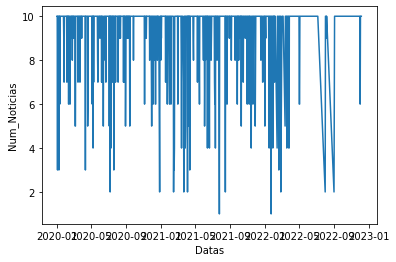

In [16]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [17]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

,Num_Noticias
Mes,
1,9.07
2,8.91
3,9.01
4,9.46
5,9.55
6,9.47
7,9.03
8,9.38
9,9.56


In [18]:
data_df.head(20)

,Datas,Num_Noticias,Mes
96,2020-01-01,10,1
589,2020-01-02,10,1
841,2020-01-03,3,1
205,2020-01-04,10,1
89,2020-01-05,10,1
616,2020-01-06,10,1
398,2020-01-07,10,1
842,2020-01-08,3,1
303,2020-01-09,10,1
181,2020-01-10,10,1


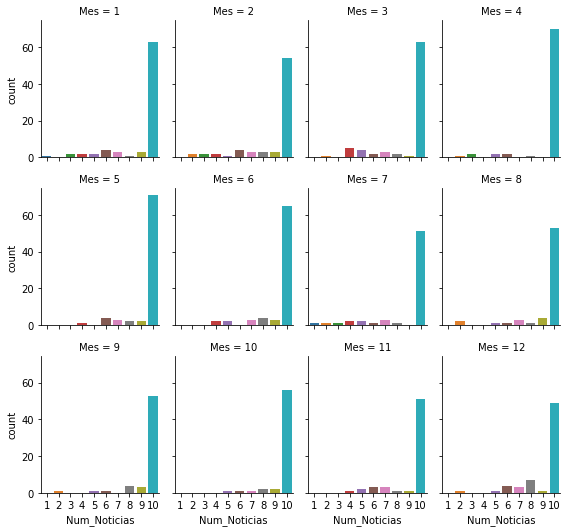

In [19]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

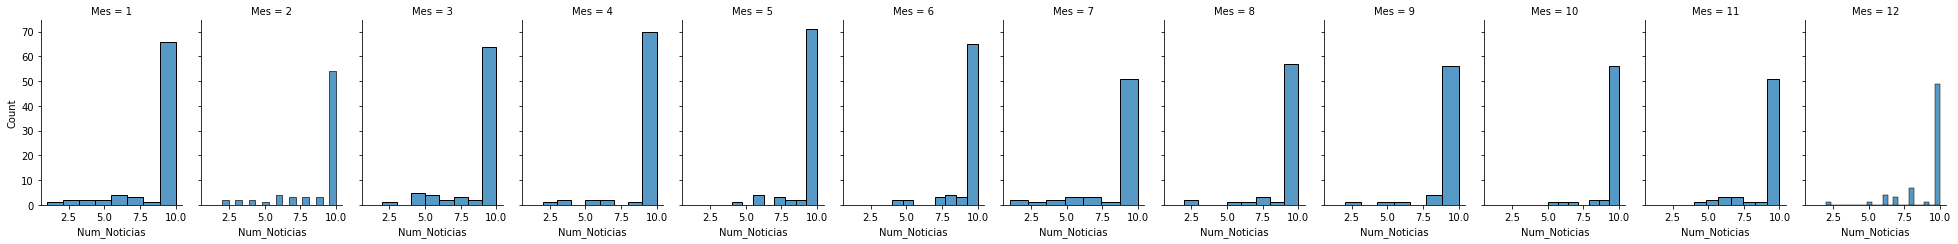

In [20]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8 á 10.

## 3.2 Há poucos dias sem noticias na base de dados

In [21]:
from datetime import datetime

In [22]:
## Gerando uma lista com todos os dias:
start_date = '01/01/2020'
end_date = '31/12/2022'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [23]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [24]:
#Gerando lista com todas as datas sem noticias 
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias no periodo considerado!" % len(datas_sem_noticias))

Há 238 dias sem notícias no periodo considerado!


In [25]:
datas_sem_noticias

['14/01/2021',
 '15/01/2021',
 '24/01/2021',
 '27/01/2021',
 '04/02/2021',
 '04/03/2021',
 '05/03/2021',
 '09/03/2021',
 '19/03/2021',
 '02/04/2021',
 '14/04/2021',
 '20/04/2021',
 '24/04/2021',
 '12/05/2021',
 '15/05/2021',
 '23/05/2021',
 '04/06/2021',
 '19/06/2021',
 '27/06/2021',
 '01/07/2021',
 '20/07/2021',
 '22/07/2021',
 '28/07/2021',
 '30/07/2021',
 '06/08/2021',
 '08/08/2021',
 '13/08/2021',
 '09/09/2021',
 '10/09/2021',
 '04/10/2021',
 '16/10/2021',
 '23/10/2021',
 '04/11/2021',
 '21/11/2021',
 '23/11/2021',
 '29/11/2021',
 '04/12/2021',
 '19/12/2021',
 '03/01/2022',
 '07/01/2022',
 '08/01/2022',
 '09/01/2022',
 '10/01/2022',
 '11/01/2022',
 '12/01/2022',
 '18/01/2022',
 '07/02/2022',
 '08/02/2022',
 '09/02/2022',
 '10/02/2022',
 '11/02/2022',
 '12/02/2022',
 '22/02/2022',
 '23/02/2022',
 '27/02/2022',
 '28/02/2022',
 '01/03/2022',
 '07/03/2022',
 '08/03/2022',
 '09/03/2022',
 '10/03/2022',
 '11/03/2022',
 '12/03/2022',
 '22/03/2022',
 '03/04/2022',
 '07/04/2022',
 '08/04/20

Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [26]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [27]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [28]:
print("Há %s dias sem pregão no periodo considerado!" % len(datas_sem_pregao))

Há 477 dias sem pregão no periodo considerado!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [29]:
df.head()

,title,media,date,desc
0,Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,"Preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,"Série ""Cineastas"" e mais dicas para curtir na ...",GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,Feriados em 2020: 11 datas serão em dias da se...,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,O incêndio que matou quase todos os macacos em...,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...


In [30]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,title,media,date,desc
0,pré-sal: centro oeste fica com r$ 1 bilhão dos...,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,"preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,"série ""cineastas"" e mais dicas para curtir na ...",GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,feriados em 2020: 11 datas serão em dias da se...,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,o incêndio que matou quase todos os macacos em...,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...


## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [31]:
df.iloc[2][0]

'série "cineastas" e mais dicas para curtir na tv nesta quarta-feira'

In [32]:
df.iloc[2][3]

'Cosmatos; e, por fim, às 23h15min, Rambo III (1988), de Peter MacDonald.  Especial Lenine e Petrobras Sinfônica - TV Brasil, 22h. Concerto especial  com o...'

In [33]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

,title,media,date,desc
0,,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,,Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,,GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...
...,...,...,...,...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...
7981,ações petrobras: saiba o preço após fechamento...,UOL Economia,2022-06-30,As ações da Petrobras fecharam em queda nesta ...


In [34]:
df = df[(df['title'] != "")]
df

,title,media,date,desc
10,indústria tem maior nível de emprego em 4 anos...,G1,2020-02-01,Indústria tem maior nível de emprego em 4 anos...
11,"clarissa lins, do ibp, renuncia como integrant...",Época Negócios,2020-02-01,A Petrobras informa que a conselheira de admin...
12,petrobras viverá momento de transformação nos ...,Valor Econômico,2020-02-01,Os anos 2020 prometem ser de profundas transfo...
20,governo não descarta intervir na petrobras par...,Blog do Correio Braziliense,2020-03-01,Assessores próximos do presidente Jair Bolsona...
21,postos aguardam petrobras para reajustar preço...,Metrópoles,2020-03-01,Postos aguardam Petrobras para reajustar preço...
...,...,...,...,...
7977,"petrobras pagará r$ 30,9 bi por plataformas",Valor Econômico,2022-06-30,O resultado da licitação internacional bilioná...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...


### Dispersão das fontes de notícias

In [35]:
dfmed1 = df
dfmed1['media'] = dfmed1['media'].str.replace('Click Petróleo e Gás','CPG Click Petroleo e Gas')
dfmed = dfmed1.groupby(['media']).count()
dfmed.sort_values(by='title', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
totnot = dfmed['title'].sum()
dfmed['title'] = pd.to_numeric(dfmed['title'])
dfmed['perc'] = ((dfmed['title'] / totnot) *100)
dfmed['perc'] = dfmed['perc'].round(2)

<AxesSubplot:ylabel='media'>

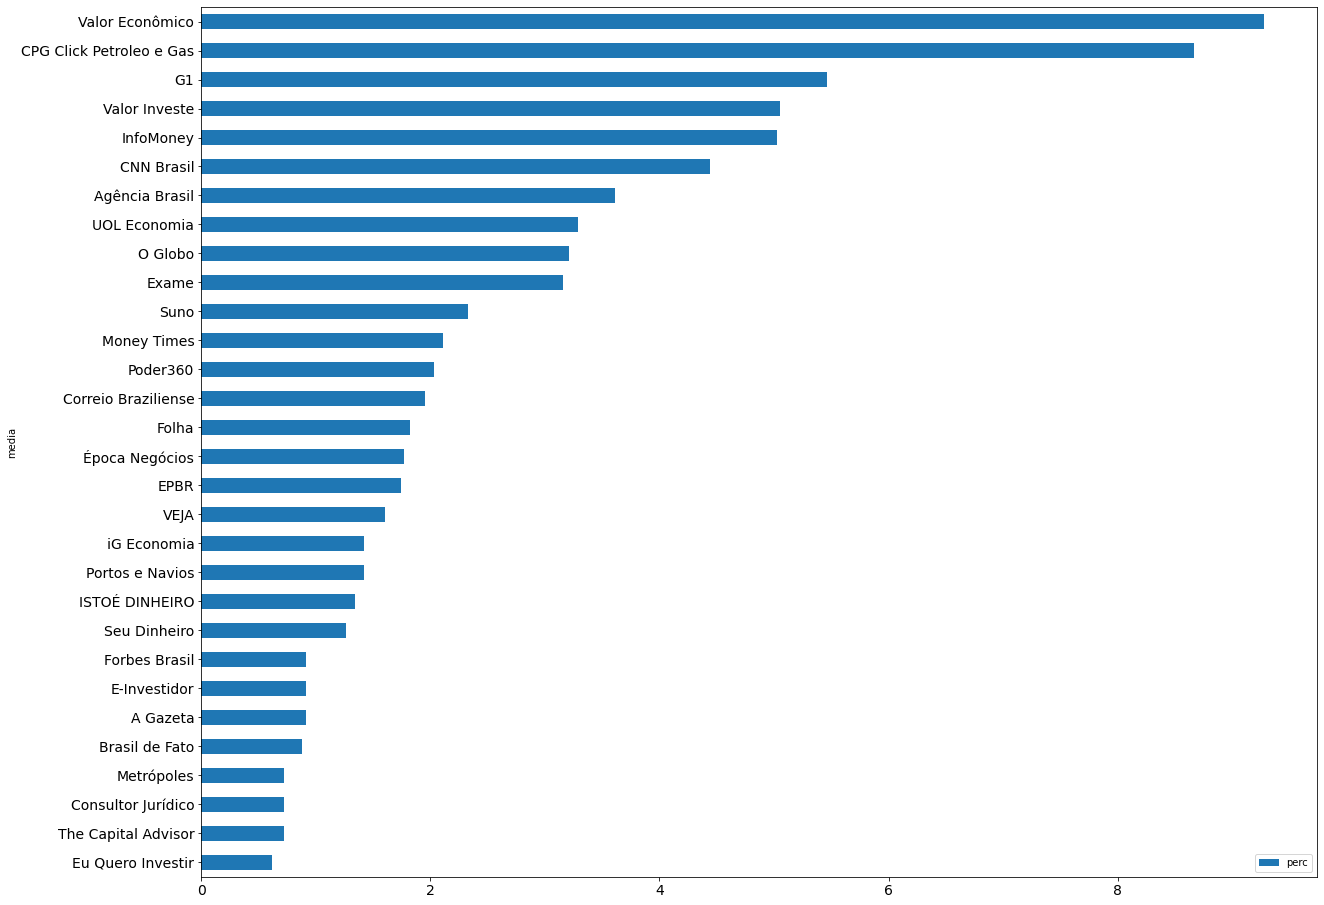

In [36]:
dfmed.sort_values(by='perc', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
dfmed = dfmed.head(30)
dfmed.sort_index(ascending=False).plot(kind='barh',x='media', y='perc', figsize=(20,16),fontsize=(14))

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [37]:
df_petro

,Date,Adj Close,Volume,Var%
0,2020-01-02,20.47,37774500,0.02
1,2020-01-03,20.30,71595600,-0.01
2,2020-01-06,20.54,81844000,0.01
3,2020-01-07,20.46,32822000,-0.00
4,2020-01-08,20.33,48215600,-0.01
...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01
615,2022-06-27,27.98,90417700,0.06
616,2022-06-28,28.33,51388000,0.01
617,2022-06-29,28.08,52048800,-0.01


In [38]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

,Date,Adj Close,Volume,Var%,Fechamento
0,2020-01-02,20.47,37774500,0.02,1
1,2020-01-03,20.30,71595600,-0.01,0
2,2020-01-06,20.54,81844000,0.01,1
3,2020-01-07,20.46,32822000,-0.00,0
4,2020-01-08,20.33,48215600,-0.01,0
...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0
615,2022-06-27,27.98,90417700,0.06,1
616,2022-06-28,28.33,51388000,0.01,1
617,2022-06-29,28.08,52048800,-0.01,0


In [39]:
df_petro.Fechamento.value_counts()

1    319
0    300
Name: Fechamento, dtype: int64

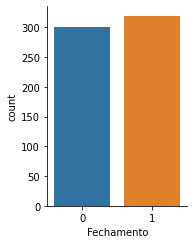

In [40]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Há um balanceamento de classes! Não precisaremos investir muito tempo em tecnicas de balanceamento para treinar o modelo

## 4.5 Concatenar noticias diárias

In [41]:
df_petro.head()

,Date,Adj Close,Volume,Var%,Fechamento
0,2020-01-02,20.47,37774500,0.02,1
1,2020-01-03,20.30,71595600,-0.01,0
2,2020-01-06,20.54,81844000,0.01,1
3,2020-01-07,20.46,32822000,-0.00,0
4,2020-01-08,20.33,48215600,-0.01,0


In [42]:
df.head()

,title,media,date,desc
10,indústria tem maior nível de emprego em 4 anos...,G1,2020-02-01,Indústria tem maior nível de emprego em 4 anos...
11,"clarissa lins, do ibp, renuncia como integrant...",Época Negócios,2020-02-01,A Petrobras informa que a conselheira de admin...
12,petrobras viverá momento de transformação nos ...,Valor Econômico,2020-02-01,Os anos 2020 prometem ser de profundas transfo...
20,governo não descarta intervir na petrobras par...,Blog do Correio Braziliense,2020-03-01,Assessores próximos do presidente Jair Bolsona...
21,postos aguardam petrobras para reajustar preço...,Metrópoles,2020-03-01,Postos aguardam Petrobras para reajustar preço...


In [43]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [44]:
pd.set_option('display.max_rows', 50)

In [45]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

,Date,Noticias
27,2020-01-02,petrobras e vale retiram seus funcionários de...
53,2020-01-03,petrobras reduz preços do diesel e da gasolin...
81,2020-01-04,petrobras faz redução em produção de petróleo...
128,2020-01-06,petrobras avança processo de venda de campos ...
148,2020-01-07,o adeus da petrobras ao amazonas petrobras vê...
...,...,...
641,2022-12-02,bolsonaro diz que trabalha com petrobras para...
661,2022-12-03,"bolsonaro diz que petrobras tem ""lucro absurd..."
691,2022-12-04,comitê da petrobras aprova nome de josé mauro...
718,2022-12-05,guedes diz que encaminhará ‘imediatamente’ es...


## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [46]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

,Date,Noticias
0,2020-01-06,petrobras faz redução em produção de petróle...
1,2020-01-13,quase fechada a venda de refinaria da petrob...
2,2020-01-20,"após bb, petrobras também anuncia que aposen..."
3,2020-01-27,demissões em empresa da petrobras em araucár...
4,2020-02-03,indústria tem maior nível de emprego em 4 an...
...,...,...
134,2022-06-06,governo indica josé mauro ferreira coelho pa...
135,2022-06-13,defasagem de combustíveis se sustenta nas re...
136,2022-06-17,petrobras anuncia reajuste da gasolina e do ...
137,2022-06-20,bolsonaro faz novos ataques à petrobras por ...


## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [47]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [48]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(767, 785)

## 4.8 Mesclando o dataframe noticias finais e ações

In [49]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
4,2020-01-08,20.33,48215600,-0.01,0,NaN
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...
6,2020-01-10,20.18,25397500,-0.00,0,petrobras pode criar subsidiárias para vender...
7,2020-01-13,20.22,30676800,0.00,1,quase fechada a venda de refinaria da petrob...
8,2020-01-14,20.00,39796500,-0.01,0,fábrica de fertilizantes da petrobras no para...
9,2020-01-15,19.70,34405700,-0.02,0,petrobras vende ativos na nigéria e encerra a...


In [50]:
df_news_diaria_atualizada.head(12)

,Date,Noticias
0,2020-01-02,petrobras e vale retiram seus funcionários de...
1,2020-01-03,petrobras reduz preços do diesel e da gasolin...
2,2020-01-04,petrobras faz redução em produção de petróleo...
3,2020-01-06,petrobras faz redução em produção de petróle...
4,2020-01-07,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,refinarias da petrobras apresentam queda na c...
6,2020-01-10,petrobras pode criar subsidiárias para vender...
7,2020-01-11,quase fechada a venda de refinaria da petrobr...
8,2020-01-12,petrobras vende áreas de produção e abre espa...
9,2020-01-13,quase fechada a venda de refinaria da petrob...


In [51]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2020-01-08
 25    2020-02-06
 28    2020-02-11
 31    2020-02-14
 43    2020-03-05
          ...    
 600   2022-06-03
 602   2022-06-07
 603   2022-06-08
 604   2022-06-09
 605   2022-06-10
 Name: Date, Length: 76, dtype: datetime64[ns],
 76)

No total houveram 76 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [52]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(619, 76)

## 4.9 Exclusão dias com pregões sem noticias

In [53]:
df_final = df_final.dropna()

In [54]:
len(df_final)

543

In [55]:
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...
...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...


# 5.0 Feature Engineering

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

# 5.1 Sentilex: Função gerar score

Criando um dicionário com polaridades

In [56]:
## Função para montar dicionarios
def montar_dicionario(versao_sentilex):
    versao = 'Versoes dicionarios sentilex/SentiLex-lem-PT01 editado v' + versao_sentilex + '.txt'
    sentilexpt = open(versao,'r',encoding='utf-8-sig')
    dic_palavra_polaridade = {}
    
    for i in sentilexpt.readlines():
        pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
        palavra = (i[:pos_ponto])          # Pega a palavra
        pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
        polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
        #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
        dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    
    return dic_palavra_polaridade


## Funçao para retornar o score do sentimento lendo o dicionario
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [57]:
## iniciando as features com a versão original do sentilex
sentilexpt = open('Versoes dicionarios sentilex/SentiLex-lem-PT01.txt','r',encoding='utf-8-sig')

dic_palavra_polaridade = {}

for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [58]:
print (dic_palavra_polaridade.get('legal'))

1


In [59]:
print (dic_palavra_polaridade.get('milhão'))

None


In [60]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']

In [61]:
df_final['score'] = df_final['Noticias'].apply(lambda x: Score_sentimento(x))
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0
...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0


# 5.2 Tradução noticias

### Função de tradução

In [62]:
from googletrans import Translator

In [63]:
trans = Translator()

In [64]:
trans.translate("The book is on the table", dest = 'pt').text

'O livro está sobre a mesa'

In [65]:
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [66]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

In [67]:
df_final['Noticia_traduzida'] = df_final['Noticias'].apply(lambda x: traduzir(x))
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0,petrobras and vale withdraw their employees fr...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0,petrobras reduces diesel and gasoline prices a...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0,petrobras makes reduction in oil production an...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0,petrobras goodbye to amazons petrobras sees mo...
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...
...,...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0,petrobras eligibility committee approves caio ...
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1,caio andrade denies government recommendation ...
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0,petrobras: new president will not be able to c...
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0,paes de andrade misses first meeting of petrob...


In [68]:
#Tradução alternativa
#df_final3.reset_index(inplace=True)
#df_final3.drop(['index'], axis = 1, inplace = True) 

#import time
#for i in range(0, len(df_final3['Noticias'])):
    #if len(df_final3['Noticias'][i])>0:
        #df_final3['Noticias'][i] = trans.translate(df_final3['Noticias'][i]).text
        #time.sleep(2)

## 5.3 Vader Sentiment: Função gerar scores Vader

In [69]:
from textblob import TextBlob

In [70]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [71]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

In [72]:
polaridade("tudo ótimo e perfeito"), subjetividade("tudo ótimo e perfeito")

(0.0, 0.0)

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [74]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [75]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [76]:
type(sentiment)
sentiment.get('neu')

0.556

In [77]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento

In [78]:
negatividade("tudo ótimo e perfeito"), neutralidade("tudo ótimo e perfeito"), positividade("tudo ótimo e perfeito"), composicao("tudo ótimo e perfeito")

(0.0, 1.0, 0.0, 0.0)

In [79]:
df_final['polaridade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: polaridade(str(x)))
df_final['subjetividade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: subjetividade(str(x)))
df_final['negatividade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: negatividade(str(x)))
df_final['neutralidade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: neutralidade(str(x)))
df_final['positividade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: positividade(str(x)))
df_final['composicao_vad'] = df_final['Noticia_traduzida'].apply(lambda x: composicao(str(x)))

# 5.4 roBERTa: Função gerar score roBERTa
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [80]:
#pip install –upgrade pip

In [81]:
#pip install tensorflow

In [82]:
#pip install transformers

In [83]:
#pip install torch

In [84]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [85]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [86]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [87]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta
    

In [88]:
df_final['neg_rob'] = df_final['Noticia_traduzida'].apply(lambda x: neg_rob(str(x)))
df_final['neu_rob'] = df_final['Noticia_traduzida'].apply(lambda x: neu_rob(str(x)))
df_final['pos_rob'] = df_final['Noticia_traduzida'].apply(lambda x: pos_rob(str(x)))

# 5.5 finBERT: Função gerar score finBERT

In [89]:
#pip install transformers

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [90]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [91]:
sentences = ["there is a shortage of capital, and we need extra financing"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


[{'label': 'Negative', 'score': 0.9966173768043518}]


In [92]:
sentences = ["cool facinanting loss"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9918428659439087}]


In [93]:
def sentimento_finbert_pos(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Positive":
        score = dict_results.get('score')
    else:
        score = 0
        
    return score

def sentimento_finbert_neg(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Negative":
        score = -1*dict_results.get('score')
    else:
        score = 0
        
    return score

def sentimento_finbert_neu(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Neutral":
        score = dict_results.get('score')
    else:
        score = 0        
        
    return score

In [94]:
sentimento_finbert_neg("there is a shortage of capital, and we need extra financing")

-0.9966173768043518

In [95]:
df_final['pos_finbert'] = df_final['Noticia_traduzida'].apply(lambda x: sentimento_finbert_pos(x))
df_final['neg_finbert'] = df_final['Noticia_traduzida'].apply(lambda x: sentimento_finbert_neg(x))
df_final['neu_finbert'] = df_final['Noticia_traduzida'].apply(lambda x: sentimento_finbert_neu(x))

# 6.0 Pré-processamento 2.0 - Adição do conjunto de features de dias anteriores

adicionaremos as features de n dias anteriores para avaliar a performance da classificação
n = 4

In [96]:
df_final99 = df_final.copy()
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias',
       'score', 'Noticia_traduzida', 'polaridade_vad', 'subjetividade_vad',
       'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad', 'neg_rob', 'neu_rob', 'pos_rob', 'pos_finbert',
       'neg_finbert', 'neu_finbert'],
      dtype='object')

In [97]:
features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

In [98]:
#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final99[i+"d1"] = 0
    df_final99[i+"d2"] = 0
    df_final99[i+"d3"] = 0
    df_final99[i+"d4"] = 0
df_final99.head()

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida,polaridade_vad,subjetividade_vad,...,pos_finbertd3,pos_finbertd4,neg_finbertd1,neg_finbertd2,neg_finbertd3,neg_finbertd4,neu_finbertd1,neu_finbertd2,neu_finbertd3,neu_finbertd4
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0,petrobras and vale withdraw their employees fr...,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0,petrobras reduces diesel and gasoline prices a...,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0,petrobras makes reduction in oil production an...,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0,petrobras goodbye to amazons petrobras sees mo...,0.50,0.50,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...,0.00,0.12,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final99[['Date','score','scored4']]

,Date,score,scored4
0,2020-01-02,0,0
1,2020-01-03,0,0
2,2020-01-06,0,0
3,2020-01-07,0,0
5,2020-01-09,0,0
...,...,...,...
614,2022-06-24,0,0
615,2022-06-27,-1,0
616,2022-06-28,0,0
617,2022-06-29,0,0


In [100]:
import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final99[b] = df_final99.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final99[b] = df_final99.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final99[b] = df_final99.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final99[b] = df_final99.shift(periods=4)[a]


In [101]:
df_final99[['Date','score','scored4']]

,Date,score,scored4
0,2020-01-02,0,nan
1,2020-01-03,0,nan
2,2020-01-06,0,nan
3,2020-01-07,0,nan
5,2020-01-09,0,0.00
...,...,...,...
614,2022-06-24,0,-1.00
615,2022-06-27,-1,2.00
616,2022-06-28,0,-1.00
617,2022-06-29,0,0.00


In [102]:
df_final99.isnull().sum()

Date             0
Adj Close        0
Volume           0
Var%             0
Fechamento       0
                ..
neg_finbertd4    4
neu_finbertd1    1
neu_finbertd2    2
neu_finbertd3    3
neu_finbertd4    4
Length: 72, dtype: int64

In [103]:
## Eliminação dos registros sem as features de dias anteriores (os primeiros 4 dias)
df_final99 = df_final99.dropna()
df_final99.isnull().sum()

Date             0
Adj Close        0
Volume           0
Var%             0
Fechamento       0
                ..
neg_finbertd4    0
neu_finbertd1    0
neu_finbertd2    0
neu_finbertd3    0
neu_finbertd4    0
Length: 72, dtype: int64

In [104]:
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias',
       'score', 'Noticia_traduzida', 'polaridade_vad', 'subjetividade_vad',
       'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad', 'neg_rob', 'neu_rob', 'pos_rob', 'pos_finbert',
       'neg_finbert', 'neu_finbert', 'polaridade_vadd1', 'polaridade_vadd2',
       'polaridade_vadd3', 'polaridade_vadd4', 'subjetividade_vadd1',
       'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4',
       'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3',
       'negatividade_vadd4', 'neutralidade_vadd1', 'neutralidade_vadd2',
       'neutralidade_vadd3', 'neutralidade_vadd4', 'positividade_vadd1',
       'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4',
       'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3',
       'composicao_vadd4', 'scored1', 'scored2', 'scored3', 'scored4',
       'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4', 

In [105]:
df_final99

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida,polaridade_vad,subjetividade_vad,...,pos_finbertd3,pos_finbertd4,neg_finbertd1,neg_finbertd2,neg_finbertd3,neg_finbertd4,neu_finbertd1,neu_finbertd2,neu_finbertd3,neu_finbertd4
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...,0.00,0.12,...,1.00,0.00,0.00,0.00,0.00,-1.00,0.93,1.00,0.00,0.00
6,2020-01-10,20.18,25397500,-0.00,0,petrobras pode criar subsidiárias para vender...,1,petrobras may create subsidiaries to sell 8 re...,0.00,0.00,...,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.93,1.00,0.00
7,2020-01-13,20.22,30676800,0.00,1,quase fechada a venda de refinaria da petrob...,1,the sale of petrobras refinery in bahia almost...,0.05,0.25,...,0.00,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.93,1.00
8,2020-01-14,20.00,39796500,-0.01,0,fábrica de fertilizantes da petrobras no para...,0,petrobras fertilizer plant in paraná closes do...,-0.15,0.53,...,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.93
9,2020-01-15,19.70,34405700,-0.02,0,petrobras vende ativos na nigéria e encerra a...,1,petrobras sells assets in nigeria and closes a...,-0.16,0.29,...,0.00,0.00,0.00,0.00,0.00,-1.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0,petrobras eligibility committee approves caio ...,0.07,0.36,...,0.00,0.00,0.00,0.00,0.00,-0.75,1.00,1.00,0.97,0.00
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1,caio andrade denies government recommendation ...,-0.04,0.32,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.97
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0,petrobras: new president will not be able to c...,0.17,0.41,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0,paes de andrade misses first meeting of petrob...,0.14,0.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.99,1.00,1.00,1.00


# 7.0 Amostragem

## 7.1 Separação entre Treino+Validação / Teste

- Dados de 2020 e 2021: Treino + Validação - Separados para treinar e selecionar melhores hyperparametros do modelo
- Dados de 2022: Teste - Servirá como teste final dos algoritmos prevendo um cenário futuro (2022) com dados nunca vistos

In [106]:
from dateutil import parser
df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]

X_test = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_test = df_test['Fechamento']

df_test.Date.unique()

array(['2022-01-03T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-06T00:00:00.000000000',
       '2022-01-10T00:00:00.000000000', '2022-01-13T00:00:00.000000000',
       '2022-01-14T00:00:00.000000000', '2022-01-17T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-01-24T00:00:00.000000000',
       '2022-01-25T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-28T00:00:00.000000000',
       '2022-01-31T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-02-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-02-07T00:00:00.000000000',
       '2022-02-14T00:00:00.000000000', '2022-02-15T00:00:00.000000000',
       '2022-02-16T00:00:00.000000000', '2022-02-17T00:00:00.000000000',
       '2022-02-18T00:00:00.000000000', '2022-02-21

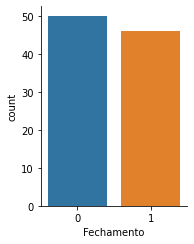

In [107]:
sns.catplot(x="Fechamento",
                data=df_test,
                kind="count", height=3.5, aspect=.8)

## 7.2 Separação entre Treino/Validação - Amostragem Sistemática
- De forma que ambas amostras representem equitativamente e proporcionalmente todo o espaço temporal (Jan de 2020 á Dez 2021), portanto, realizaremos amostragem sistemática definindo um intervalo dependente da proporção treino/validação desejada.

Para proporção de 33% validação e 66% treino o intervalo para amostragem é de 3 ( para representar todo o espaço temporal )

In [108]:
indices_validacao = np.arange(0,len(df_treino_valid),3)
indices_validacao_lista = indices_validacao.tolist()

In [109]:
#cria array com todos os indexes
indices_train = np.arange(0,len(df_treino_valid),1)
indices_train_lista = indices_train.tolist()

# seleciona os indexes que nao estejam na validacao
indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]

#transforma para array
indices_train = np.array(indices_train)

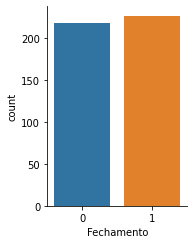

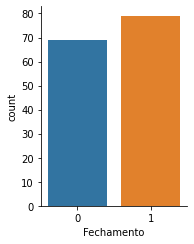

In [110]:
df_train =  df_treino_valid.iloc[indices_train]
X_train = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_train = df_train['Fechamento']

df_valid = df_treino_valid.iloc[indices_validacao]
X_valid = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_valid = df_valid['Fechamento']


sns.catplot(x="Fechamento",
                data=df_train,
                kind="count", height=3.5, aspect=.8)

sns.catplot(x="Fechamento",
                data=df_valid,
                kind="count", height=3.5, aspect=.8)



In [111]:
len(df_valid)/len(df_train)

0.3340857787810384

# 8.0 Consolidação dos dados de diversas versões do sentilex

In [186]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
dict_dados_variacoes_sentilex = {}

for versao in versoes_sentilex:
    
    #print(versao)
    ## Atualizando Score Sentilex (Etapa 5.1)
    dic_palavra_polaridade  = montar_dicionario(versao)

    df_final['score'] = df_final['Noticias'].apply(lambda x: Score_sentimento(x))
    
    df_final99 = df_final.copy()


    features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
           'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
    featuresd1 = [i + "d1" for i in features]
    featuresd2 = [i + "d2" for i in features]
    featuresd3 = [i + "d3" for i in features]
    featuresd4 = [i + "d4" for i in features]


    #Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
    for i in features:
        df_final99[i+"d1"] = 0
        df_final99[i+"d2"] = 0
        df_final99[i+"d3"] = 0
        df_final99[i+"d4"] = 0


    import itertools

    #atualiza as features de d-1
    for a,b in itertools.zip_longest(features,featuresd1):
        df_final99[b] = df_final99.shift(periods=1)[a]

    #atualiza as features de d-2
    for a,b in itertools.zip_longest(features,featuresd2):
        df_final99[b] = df_final99.shift(periods=2)[a]

    #atualiza as features de d-3
    for a,b in itertools.zip_longest(features,featuresd3):
        df_final99[b] = df_final99.shift(periods=3)[a]

    #atualiza as features de d-4
    for a,b in itertools.zip_longest(features,featuresd4):
        df_final99[b] = df_final99.shift(periods=4)[a]


    df_final99 = df_final99.dropna()


    ## Aplicando mesma reamostragem

    from dateutil import parser
    df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
    df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]
    df_test.Date.unique()

    indices_validacao = np.arange(0,len(df_treino_valid),3)
    indices_validacao_lista = indices_validacao.tolist()

    #cria array com todos os indexes
    indices_train = np.arange(0,len(df_treino_valid),1)
    indices_train_lista = indices_train.tolist()

    # seleciona os indexes que nao estejam na validacao
    indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]

    #transforma para array
    indices_train = np.array(indices_train)

    # Redefinindo os datasets
    df_train =  df_treino_valid.iloc[indices_train]                 
                   
    df_valid = df_treino_valid.iloc[indices_validacao]
                      
    
    dict_dados_variacoes_sentilex[versao] = [df_train,df_valid,df_test]

os dados de validação correspondem a 33% dos dados de teste

# 9.0 Prototipação

In [ ]:
Iremos treinar modelos ingenuos com dados de Treino e verificar quais deles performam melhor em dados não vistos do futuro (2022) - Dados de teste

In [205]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models = pd.DataFrame()

#Loop numero de repetições do experimento
for i in range(1):

    print(i)
    
   ##Loop do dicionário Sentilex Escolhido: 
    for versao in dict_dados_variacoes_sentilex.keys():
        
        print(versao)

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_valid2 = df_valid['Fechamento']


        #Definindo dados de treino (aprendendo com 100% da amostra de treino)
        X_train4 = X_train2
        y_train4 = y_train2 
        

        # Normalizando
        scaler = StandardScaler()
        scaler.fit(X_train4)

        X_train_norm = scaler.transform(X_train4)
        X_test_norm = scaler.transform(X_test2)
        
        

        #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models = df_models.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models = df_models.append(models.reset_index(), ignore_index=True)
        
        
         ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA) de 2 a 10 reduções
        for i in range(2,10,1): 

            #Aplicando PCA
            pca = PCA(n_components=i)
            X_train_pca = pca.fit_transform(X_train4)
            X_test_pca = pca.fit_transform(X_test2)

            #Aplicando Normalização
            scaler = StandardScaler()
            scaler_train = StandardScaler()
            scaler_test = StandardScaler()
            
            scaler_train.fit(X_train_pca)
            scaler_test.fit(X_test_pca)

            X_train_pca_normalized = scaler_train.transform(X_train_pca)
            X_test_pca_normalized = scaler_test.transform(X_test_pca)



            #Testando PCA + normalizado 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models = df_models.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models = df_models.append(models.reset_index(), ignore_index=True)    


0
65_1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.38it/s]


65_2


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.36it/s]


65_3


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.77it/s]


65_4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.27it/s]


65_5


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.27it/s]


70_1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.14it/s]


70_2


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.55it/s]


70_3


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.92it/s]


70_4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.35it/s]


70_5


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.01it/s]


75_1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.49it/s]


75_2


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.32it/s]


75_3


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.58it/s]


75_4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.57it/s]


75_5


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.67it/s]


80_1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.03it/s]


80_2


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.24it/s]


80_3


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.81it/s]


80_4


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 23.55it/s]


80_5


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.72it/s]


In [206]:
pd.set_option('display.precision',5)

In [207]:
pd.reset_option('^display.',silent=True)

In [208]:
df_models.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy':np.mean, 'Balanced Accuracy':np.mean, 'ROC AUC':np.mean, 'F1 Score':np.mean}).sort_values(by='Balanced Accuracy', ascending=False).head(50)

Accuracy  \
Model                         n_PCA versao_sentilex Normalizacao             
ExtraTreeClassifier           6     70_3            NAO           0.656250   
XGBClassifier                 3     80_3            SIM           0.656250   
ExtraTreeClassifier           3     80_4            NAO           0.645833   
                              5     70_1            NAO           0.645833   
NuSVC                         3     80_2            SIM           0.635417   
ExtraTreeClassifier           8     70_4            NAO           0.635417   
LabelPropagation              3     70_1            NAO           0.635417   
SGDClassifier                 8     80_1            SIM           0.635417   
DecisionTreeClassifier        2     70_2            NAO           0.635417   
PassiveAggressiveClassifier   9     80_1            NAO           0.635417   
                                                    SIM           0.635417   
LabelSpreading                8     80_1            SIM           0.625000   
                              3     70_1            NAO           0.625000   
LabelPropagation              8     80_1            SIM           0.625000   
BaggingClassifier             2     80_2            SIM           0.625000   
RandomForestClassifier        2     80_3            SIM           0.625000   
LGBMClassifier                2     80_5            NAO           0.625000   
SGDClassifier                 7     80_1            SIM           0.625000   
ExtraTreesClassifier          5     80_5            SIM           0.625000   
DecisionTreeClassifier        2     70_2            SIM           0.625000   
Perceptron                    7     80_1            SIM           0.614583   
ExtraTreesClassifier          5     80_4            SIM           0.625000   
Perceptron                    7     80_1            NAO           0.614583   
PassiveAggressiveClassifier   9     80_2            SIM           0.625000   
ExtraTreeClassifier           5     70_1            SIM           0.614583   
DecisionTreeClassifier        4     75_4            NAO           0.614583   
KNeighborsClassifier          7     75_4            SIM           0.614583   
                              2     75_4            SIM           0.614583   
XGBClassifier                 2     65_5            SIM           0.614583   
DecisionTreeClassifier        2     65_5            NAO           0.614583   
SGDClassifier                 7     80_1            NAO           0.614583   
AdaBoostClassifier            2     75_5            NAO           0.614583   
BaggingClassifier             8     70_5            SIM           0.614583   
Perceptron                    4     80_3            NAO           0.614583   
LabelSpreading                5     80_5            NAO           0.614583   
LabelPropagation              5     80_5            NAO           0.614583   
BaggingClassifier             7     70_5            SIM           0.614583   
SVC                           5     80_4            NAO           0.614583   
LGBMClassifier                4     80_2            NAO           0.614583   
ExtraTreesClassifier          5     70_1            NAO           0.604167   
DecisionTreeClassifier        4     75_4            SIM           0.604167   
ExtraTreesClassifier          N/A   70_4            SIM           0.604167   
                                                    NAO           0.604167   
LGBMClassifier                2     75_4            NAO           0.604167   
SVC                           5     80_4            SIM           0.604167   
ExtraTreeClassifier           4     80_1            NAO           0.604167   
QuadraticDiscriminantAnalysis 8     70_3            NAO           0.604167   
NuSVC                         2     65_1            NAO           0.604167   
SGDClassifier                 8     80_1            NAO           0.604167   
DecisionTreeClassifier        5     70_5            SIM           0.604167   

         

## 9.0 Experimentos RF

O codigo abaixo é responsável por selecionar:
    - Fator de balanceamento nos dados de treino
    - Tecnica de balanceamento nos dados de treino
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com normalização
    - Pipelines sem normalização
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Melhor conjunto de hiperparâmetros

In [125]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)


list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']

#Loop de seed aleatória
for seed in range(30):
    
    print("Iterando seed = {}".format(seed))  
        
    ##Loop do dicionário Sentilex Escolhido: 
    for versao in dict_dados_variacoes_sentilex.keys():

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_valid2 = df_valid['Fechamento']

        
        
        
        
        ## Na há balanceamento, portanto, para evitar mudar X_train3 para X_train2 em todo código iremos usar as variáveis:
        X_test3 = X_test2
        y_test3 = y_test2

        X_train3 = X_train2
        y_train3 = y_train2

        
        
        

        ################ Definição de modelos candidatos ################
        model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
        #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)

        #models = [model1,model2]
        #nome_modelo = ['RandomForest', 'LGBM']

        models = [model1]
        nome_modelo = ['RandomForest']

        #models = [model2]
        #nome_modelo = ['LGBM']

        
        
        ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid2], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)


        ############# Paramgrid de modelos ################

        ##Grid model 1 RandomForest
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
        param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}

        ##Grid model 2 LGBM
        #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
        param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

        #list_param_grids = [param_grid1, param_grid2]
        list_param_grids = [param_grid1]

        #list_param_grids = [param_grid2]
        dictionary_paramgrid = dict(zip(models, list_param_grids))


        
        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############# GridSearch de modelos candidatos com todas features ################
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )

            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)



            #Loop Seletor de features:
            #for k in range(X_train3.shape[1]-2, X_train3.shape[1], 1):   #Iterar sobre n-1 total de features e n-3.
            #for k in range(X_train3.shape[1]-1, X_train3.shape[1]+1, 1): #Iterar sobre n total de features e n-2

            for k in range(X_train3.shape[1], X_train3.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)

            #for k in range(3, 5, 1):  ## Iterar sobre 3 á 4 features

                ## O seletor de features varia conforme a pipe de aleatório á SelectFromModel:

                ################ Definição de Pipelines com modelo tunado ################
                pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                pipe2 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                pipe4 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])

                pipelines = [pipe1,pipe2,pipe3,pipe4]


                #Loop das pipelines testadas com seletor de features e outras etapas:
                for num_pipe, pipe in enumerate(pipelines):


                    # features aleatorias aplicado ao  PIPE3 
                    if num_pipe == 2:

                        selected = np.random.choice(X_train3.columns, k, replace=False)
                        X_train4 = X_train3[selected]
                        y_train4 = y_train3

                        X_valid3 = X_valid2[selected]

                        X_test3 = X_test2[selected]

                    else:
                        X_train4 = X_train3
                        y_train4 = y_train3

                        X_valid3 = X_valid2

                        X_test3 = X_test2


                    #Fit Pipe
                    pipe.fit(X_train4,y_train4)


                   # Nome das features selecionadas para PIPE1 , PIPE2 e PIPE3
                    if num_pipe == 2:

                        features_selecionadas = ','.join(list(selected))

                    else:

                        selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                        selector.fit(X_train4,y_train4)
                        mask = selector.get_support()
                        features_selecionadas = ','.join(list(X_train4.columns[mask]))


                    #Armazenando propriedades das PIPES
                    if num_pipe == 0:
                        seletor_feature = "SelectFromModel"
                        scaler = "StandardScaler"

                    if num_pipe == 1:
                        seletor_feature = "SelectFromModel"
                        scaler = "Sem Scaler"

                    if num_pipe == 2:
                        seletor_feature = 'Aleatorio'
                        scaler = "StandardScaler"

                    if num_pipe == 3:
                        seletor_feature = 'Aleatorio'
                        seletor_feature = "SelectFromModel"
                        scaler = "MinMaxScaler"

                    ################ Calculando métricas da pipe DADOS NAO UTILIZADOS E NÃO VISTOS - TESTE ################
                    # Fazendo predição
                    p = pipe.predict(X_test3)
                    contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                    #Calculando o recall
                    recall_0 = recall_score(y_test, p, pos_label=0)
                    recall_1 = recall_score(y_test, p, pos_label=1)

                    #Calculando Precision
                    precision_0 = precision_score(y_test, p, pos_label = 0)
                    precision_1 = precision_score(y_test, p, pos_label = 1)

                    #Calculando acurácia
                    accuracy = accuracy_score(y_test, p)

                    #Calculando AUC
                    auc = roc_auc_score(y_test, p)



                    ################# Armazenando e imprimindo os resultados  ################

                    dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                    if num_modelo ==0:

                        #col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        #resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                        col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                        ## Imprime resultados do melhor modelo 1                                
                        if auc > maximo_auc_model1:

                            print("============================================================================================================================")
                            print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                            print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                            print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            print("     Features Selecionadas = {}".format(features_selecionadas))
                            print("")
                            print("============================================================================================================================")

                            melhor_modelo1 = pipe
                            maximo_auc_model1 = auc

                    if num_modelo ==1:

                        #col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        #resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                        col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                        ## Imprime resultados do melhor modelo 2
                        if auc > maximo_auc_model2:

                            print("============================================================================================================================")
                            print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                            print("     Experimento número = {}".format(contagem_experimentos_unicos))                        
                            print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            print("     Features Selecionadas = {}".format(features_selecionadas))
                            print("")
                            print("============================================================================================================================")


                            melhor_modelo2 = pipe
                            maximo_auc_model2 = auc



                    # Imprime resultados do melhor modelo global até o momento.                         
                    if auc > maximo_auc:
                        #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                        print("============================================================================================================================")
                        print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versão sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                        print("============================================================================================================================")

                        melhor_modelo = pipe
                        maximo_auc = auc
                        best_seed = seed

                    #break

Iterando seed = 0
NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.5543478260869565 - num_seed_aleatoria = 0 - versao_sentilex = 65_1
     Experimento número = 1
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 65 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = score,polaridade_vad,subjetividade_vad,negatividade_vad,neutralidade_vad,positividade_vad,composicao_vad,neg_rob,neu_rob,pos_rob,pos_finbert,neg_finbert,neu_finbert,polaridade_vadd1,polaridade_vadd2,polaridade_vadd3,polaridade_vadd4,subjetividade_vadd1,subjetividade_vadd2,subjetividade_vadd3,subjetividade_vadd4,negatividade_vadd1,negatividade_vadd2,negatividade_vadd3,negatividade_vadd4,neutralidade_vadd1,neutralidade_vadd2,neu

KeyboardInterrupt: 

## 9.1 Resultados 

In [135]:
####### Resultados Modelo 1: RF

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[11:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:11]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:11]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False)
df_agrupado.head(50)

contagem_exp  \
class_weight     criterion max_depth min_samples_leaf min_samples_split modelo       Sentilex num_pipe features                                                           
{0: 0.1, 1: 0.9} gini      None      1                2                 RandomForest 70_5     3        polaridade_vadd2,neutralidade_vadd4,positividad...             1   
                                                                                     70_3     3        subjetividade_vadd4,neg_finbertd1,composicao_va...             1   
                                                                                     70_4     3        neg_finbertd4,pos_finbertd1,pos_robd2,subjetivi...             1   
                                                                                     70_5     3        neu_robd2,negatividade_vadd3,composicao_vadd1,p...             1   
                                                                                     70_2     3        pos_robd4,neutralidade_vad,neu_finbertd2,neu_ro...             1   
                                                                                     70_4     2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              3        subjetividade_vad,subjetividade_vadd4,neg_rob,n...             1   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              1        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     75_1     3        pos_finbertd1,subjetividade_vad,pos_robd2,neg_r...             1   
                                                                                     80_5     3        polaridade_vadd1,pos_rob,subjetividade_vad,neu_...             1   
                                                                                     75_4     3        pos_finbertd4,neg_robd2,pos_robd4,neu_robd4,neu...             1   
                                                                                     70_5     1        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     70_3     2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_5     2        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     70_3     3        scored2,composicao_vad,neu_robd1,positividade_v...             1   
                                                                                     70_2     3        positividade_vadd2,pos_robd3,neutralidade_vadd3...             1   
                                                                                     65_1     3        neg_finbertd1,polaridade_vadd4,pos_finbertd1,sc...             1   
                                                                                     70_1     3        neg_finbertd2,neg_robd1,neg_robd2,neutralidade_...             1   
                                                                                     70_5     3        composicao_vadd2,scored2,composicao_vadd3,pos_r...             1   
                                                   

### Modelos mais consistentes: que foram selecionados mais de 1x nos experimentos

In [136]:
df_agrupado[(df_agrupado['contagem_exp']>1)].sort_values(by='auc', ascending=False).head(50)

contagem_exp  \
class_weight     criterion max_depth min_samples_leaf min_samples_split modelo       Sentilex num_pipe features                                                           
{0: 0.1, 1: 0.9} gini      None      1                2                 RandomForest 70_4     2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              1        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_5     1        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     70_3     2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_5     2        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     80_4     1        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                              4        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     70_3     1        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_1     4        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_2     1        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_1     1        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     70_2     4        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                              2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     80_4     2        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     65_1     2        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     80_5     4        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                                                     65_1     1        score,polaridade_vad,subjetividade_vad,negativi...             4   
                                                                                     75_2     4        score,polaridade_vad,subjetividade_vad,negativi...             3   
                                                   

### Modelos que performaram melhor, independente do número de vezes que foram selecionados nos experimentos

In [137]:
resultados_df_model1.sort_values(by='auc', ascending=False).head(50)

,contagem_exp,seed,class_weight,criterion,max_depth,min_samples_leaf,min_samples_split,modelo,Sentilex,num_pipe,features,acuracia,recall_0,recall_1,prec_0,prec_1,auc
21,22,0,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_1,2,"score,polaridade_vad,subjetividade_vad,negativ...",0.614583,0.6,0.630435,0.638298,0.591837,0.615217
23,24,0,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_1,4,"score,polaridade_vad,subjetividade_vad,negativ...",0.614583,0.6,0.630435,0.638298,0.591837,0.615217
20,21,0,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_1,1,"score,polaridade_vad,subjetividade_vad,negativ...",0.604167,0.62,0.586957,0.62,0.586957,0.603478
195,196,2,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_4,4,"score,polaridade_vad,subjetividade_vad,negativ...",0.59375,0.44,0.76087,0.666667,0.555556,0.600435
193,194,2,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_4,2,"score,polaridade_vad,subjetividade_vad,negativ...",0.59375,0.44,0.76087,0.666667,0.555556,0.600435
192,193,2,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_4,1,"score,polaridade_vad,subjetividade_vad,negativ...",0.59375,0.44,0.76087,0.666667,0.555556,0.600435
33,34,0,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_4,2,"score,polaridade_vad,subjetividade_vad,negativ...",0.59375,0.46,0.73913,0.657143,0.557377,0.599565
198,199,2,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_5,3,"polaridade_vadd2,neutralidade_vadd4,positivida...",0.59375,0.5,0.695652,0.641026,0.561404,0.597826
39,40,0,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_5,4,"score,polaridade_vad,subjetividade_vad,negativ...",0.583333,0.44,0.73913,0.647059,0.548387,0.589565
37,38,0,"{0: 0.1, 1: 0.9}",gini,None,1,2,RandomForest,70_5,2,"score,polaridade_vad,subjetividade_vad,negativ...",0.583333,0.44,0.73913,0.647059,0.548387,0.589565


# Features Importance RF

In [155]:
import joblib
import os
melhor_modelo_rf = joblib.load(open(os.path.join('modelo-RF.pkl'),"rb"))
melhor_modelo_rf

Pipeline(steps=[('seletor',
                 SelectFromModel(estimator=RandomForestClassifier(class_weight={0: 0.1,
                                                                                1: 0.9},
                                                                  n_jobs=-1,
                                                                  random_state=0),
                                 max_features=65, threshold=-inf)),
                ('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        n_jobs=-1, random_state=0))])

In [156]:
rf = melhor_modelo_rf['RandomForest']

In [159]:
df_train = dict_dados_variacoes_sentilex['70_1'][0]
df_valid = dict_dados_variacoes_sentilex['70_1'][1]
df_test = dict_dados_variacoes_sentilex['70_1'][2]

#Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
X_test4 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_test4 = df_test['Fechamento']

X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_train4 = df_train['Fechamento']

X_valid4 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_valid4 = df_valid['Fechamento']


rf.fit(X_train4,y_train4)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1, random_state=0)

In [161]:
#predict validacao
p = rf.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62        50
           1       0.59      0.63      0.61        46

    accuracy                           0.61        96
   macro avg       0.62      0.62      0.61        96
weighted avg       0.62      0.61      0.61        96


Confusion Matrix Dados - Validacao:
 [[30 20]
 [17 29]]

Recall_0: 0.6
Recall_1: 0.6304347826086957
Precision_0: 0.6382978723404256
Precision_1: 0.5918367346938775
Acuracia: 0.6145833333333334
Acuracia Balanceada: 0.6152173913043478
AUC: 0.6152173913043478


In [162]:
## Lista de features
features_names = X_train4.columns.tolist()
class_names = ['Queda','Subida']

In [163]:
feature_imp = pd.Series(rf.feature_importances_,index=features_names).sort_values(ascending=False)
feature_imp 

score                 0.042694
polaridade_vadd1      0.038686
neutralidade_vadd4    0.029220
composicao_vadd3      0.027204
polaridade_vadd2      0.027009
                        ...   
negatividade_vadd1    0.007284
pos_finbertd1         0.005955
pos_finbertd3         0.005615
negatividade_vadd3    0.005110
pos_finbertd2         0.003653
Length: 65, dtype: float64

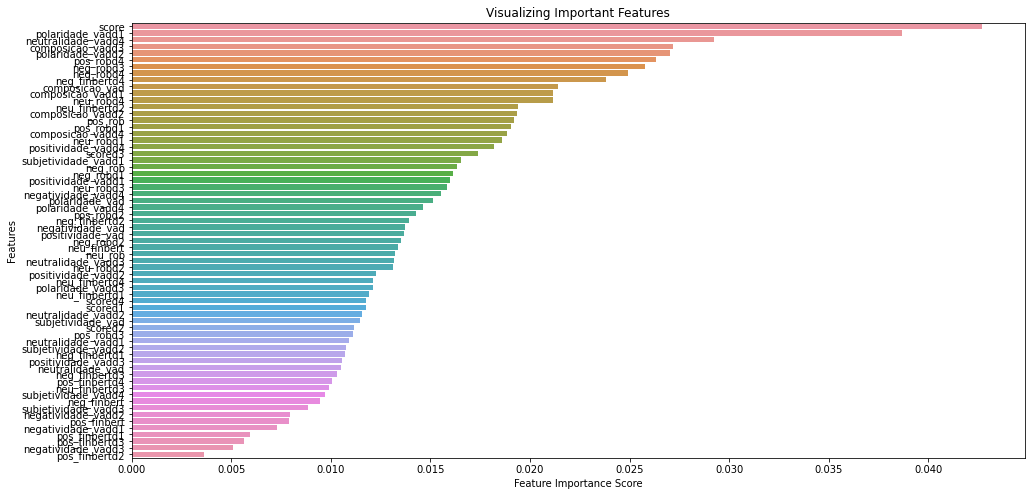

In [164]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

# 10.0 Experimentos outros modelos